In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Balanced_Preprocessed.csv")

df.shape

(244795, 3)

In [4]:
df.head()

,title,overview,genres
0,Meg 2: The Trench,An exploratory dive into the deepest depths of...,Action
1,The Pope's Exorcist,Father Gabriele Amorth Chief Exorcist of the V...,Horror
2,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,Action
3,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,Action
4,Creed III,After dominating the boxing world Adonis Creed...,Drama


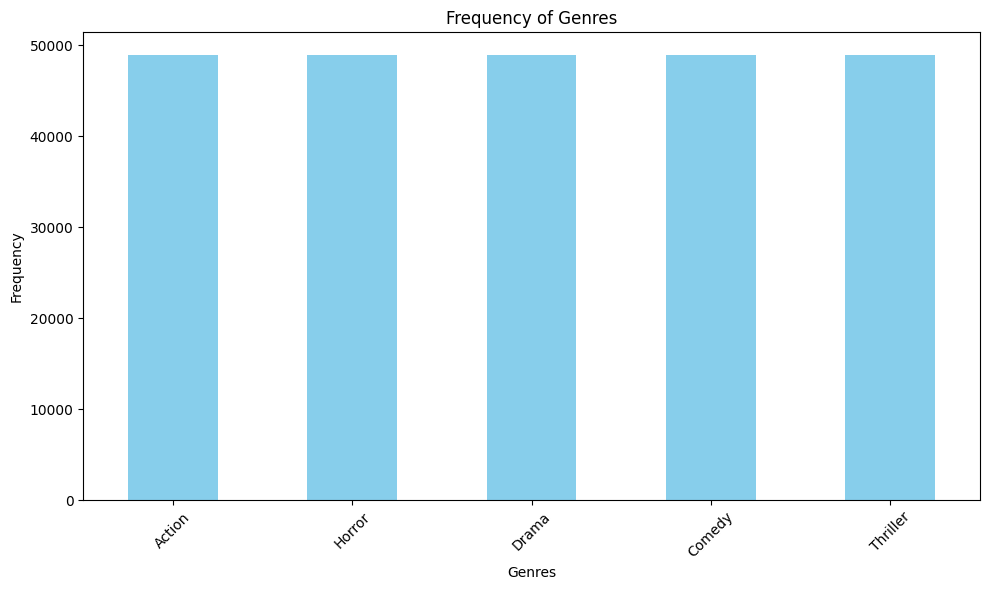

In [5]:
genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Assuming df is your original DataFrame containing all the data
# Initialize an empty list to store sampled DataFrames
dfs = []

# Define the desired number of rows for each genre
rows_per_genre = 50000

# Define the total number of rows to sample
total_rows = 250000

# Calculate the number of rows to sample for each genre
rows_per_genre = min(rows_per_genre, total_rows // len(df['genres'].unique()))

# Iterate over each genre
for genre in df['genres'].unique():
    # Subset the DataFrame for the current genre
    df_genre = df[df['genres'] == genre]
    
    # Check if the number of rows for the current genre is less than the desired number of rows
    if len(df_genre) < rows_per_genre:
        # If fewer rows available, sample all rows for the current genre
        print("less rows were found for genre ->", genre)
        df_sampled = df_genre.sample(n=len(df_genre), random_state=42)
    else:
        # Otherwise, sample the desired number of rows randomly
        df_sampled = df_genre.sample(n=rows_per_genre, random_state=42)
    
    # Append the sampled DataFrame to the list
    dfs.append(df_sampled)

# Concatenate all sampled DataFrames
df = pd.concat(dfs)

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

less rows were found for genre -> Action
less rows were found for genre -> Horror
less rows were found for genre -> Drama
less rows were found for genre -> Comedy
less rows were found for genre -> Thriller


In [7]:
df.shape

(244795, 3)

In [8]:
df.head(10)

,title,overview,genres
0,UFC Fight Night 197: Holloway vs. Rodríguez,145 lbs.: Max Holloway vs. Yair Rodriguez 265...,Action
1,It Can't Last Forever,Russ Matthews a theatrical agent who is not ab...,Comedy
2,"Crack Climbs and Land Mines, Alex Honnold in A...",Alex Honnold is the most accomplished free cli...,Action
3,Wind,In 1983 yacht sailor Will Parker leads an Amer...,Action
4,Betrayal of Silence,A new lawyer investigates the abuse case of a ...,Drama
5,Legal Deceit,Sydney Banks learns the hard way that being dr...,Thriller
6,No Place Like Home,What if Dee Dee Blanchard was a rich lady doct...,Thriller
7,Stone Cold,Joe Huff (Brian Bosworth) is a tough loner cop...,Action
8,V/H/S,When a group of misfits is hired by an unknown...,Thriller
9,Silence Becomes You,Two sisters Grace and Violet bound together by...,Thriller


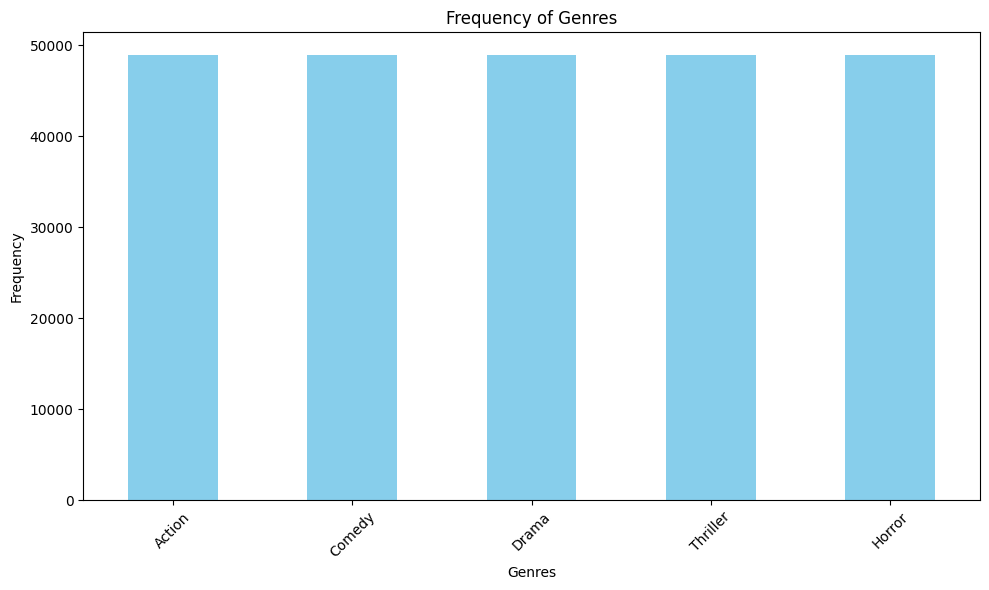

In [9]:
genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Combine the text data from "title" and "overview"
text_data = df['title'] + ' ' + df['overview']

# Step 1: Vectorize the Text Data
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)  

# Convert text data into sequences of integers
sequences = tokenizer.texts_to_sequences(text_data)

# Pad sequences to ensure uniform length
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Compute values of vocab_size, embedding_dim, and max_length
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the padding token
embedding_dim = 100  # You can adjust this value as needed

# Step 2: Train/Test Split
X = padded_sequences
y = df['genres']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 3: Define and Train the CNN Model
cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=256, kernel_size=7, activation='relu'),  # Adjust number of filters and kernel size
    GlobalMaxPooling1D(),
    Dense(256, activation='relu'),  # Adjust number of units in dense layer
    Dense(256, activation='relu'),  # Adjust number of units in dense layer
    Dense(5, activation='softmax')  # Assuming there are 5 genres/classes
])

# Compile model
optimizer = 'adam'  # Adjust optimizer and learning rate as needed
learning_rate = 0.01
cnn_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
epochs = 10  # Adjust number of epochs as needed
batch_size = 64  # Adjust batch size as needed
cnn_model.fit(X_train, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_encoded))

Epoch 1/10
3060/3060 [==============================] - 606s 198ms/step - loss: 0.7293 - accuracy: 0.7189 - val_loss: 0.4172 - val_accuracy: 0.8488
Epoch 2/10
3060/3060 [==============================] - 625s 204ms/step - loss: 0.2272 - accuracy: 0.9207 - val_loss: 0.3397 - val_accuracy: 0.8843
Epoch 3/10
3060/3060 [==============================] - 615s 201ms/step - loss: 0.0946 - accuracy: 0.9689 - val_loss: 0.3447 - val_accuracy: 0.8962
Epoch 4/10
3060/3060 [==============================] - 612s 200ms/step - loss: 0.0548 - accuracy: 0.9821 - val_loss: 0.4435 - val_accuracy: 0.8880
Epoch 5/10
3060/3060 [==============================] - 613s 200ms/step - loss: 0.0349 - accuracy: 0.9886 - val_loss: 0.4759 - val_accuracy: 0.8994
Epoch 6/10
3060/3060 [==============================] - 617s 201ms/step - loss: 0.0278 - accuracy: 0.9913 - val_loss: 0.5188 - val_accuracy: 0.8974
Epoch 7/10
3060/3060 [==============================] - 606s 198ms/step - loss: 0.0214 - accuracy: 0.9932 - val_

In [11]:
import joblib
joblib.dump(cnn_model, 'Convolutional_Neural_Network.pkl')
joblib.dump(cnn_model, 'Convolutional_Neural_Network.pkl')

['Convolutional_Neural_Network.pkl']

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Predict probabilities for each class
y_pred_probabilities = cnn_model.predict(X_test)

# Get the predicted class for each sample
y_pred = y_pred_probabilities.argmax(axis=1)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Overall Accuracy:", accuracy)


1530/1530 [==============================] - 24s 15ms/step
Overall Accuracy: 0.8948712187748933
